# Basic VCS Tutorial

In [1]:
import vcs
import cdms2

In [2]:
# MAke sure sample data is here
vcs.download_sample_data_files()

Downloading: 'th_yr.nc' from 'https://uvcdat.llnl.gov/cdat/sample_data/' in: /Users/doutriaux1/anaconda2/envs/cdat/share/uvcdat/sample_data/th_yr.nc
Downloading: 'th_yr.nc' from 'https://uvcdat.llnl.gov/cdat/sample_data/' in: /Users/doutriaux1/anaconda2/envs/cdat/share/uvcdat/sample_data/th_yr.nc
Downloading: 'th_yr.nc' from 'https://uvcdat.llnl.gov/cdat/sample_data/' in: /Users/doutriaux1/anaconda2/envs/cdat/share/uvcdat/sample_data/th_yr.nc


In [3]:
f=cdms2.open(vcs.sample_data+"/clt.nc")

In [4]:
# LOAS SAMPLE DATA
s=f("clt")

In [5]:
# Create vcs canvas (basically X window to draw in)
x=vcs.init(bg=True)

In [6]:
# plot data as is

/Users/doutriaux1/anaconda2/envs/cdat/lib/python2.7/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


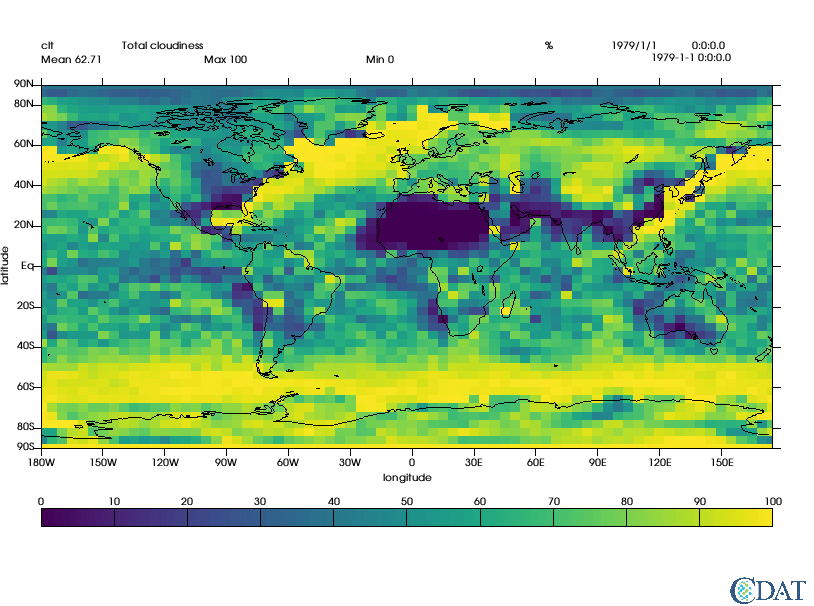

In [7]:
#because we are in jupyter using bg=True to plot thing in background (no flashing on your screen)
bg=True
x.plot(s)

In [8]:
# Now let's explore some graphics methods available
print vcs.listelements()

['1d', '3d_dual_scalar', '3d_scalar', '3d_vector', 'boxfill', 'colormap', 'display', 'fillarea', 'font', 'fontNumber', 'isofill', 'isoline', 'line', 'list', 'marker', 'meshfill', 'projection', 'scatter', 'streamline', 'taylordiagram', 'template', 'textcombined', 'textorientation', 'texttable', 'vector', 'xvsy', 'xyvsy', 'yxvsx']


In [9]:
# Let's create a isofill
gm = vcs.createisofill()

In [10]:
# Let's see what we can set/do with this
gm.list()

---------- Isofill (Gfi) member (attribute) listings ----------
graphics method = Gfi
name = __isofill_868519049142806
projection = linear
xticlabels1 = *
xticlabels2 = *
xmtics1 = 
xmtics2 = 
yticlabels1 = *
yticlabels2 = *
ymtics1 =  
ymtics2 =  
datawc_x1 = 1e+20
datawc_y1 =  1e+20
datawc_x2 =  1e+20
datawc_y2 =  1e+20
datawc_timeunits =  days since 2000
datawc_calendar =  135441
xaxisconvert =  linear
yaxisconvert =  linear
missing =  (0.0, 0.0, 0.0, 100.0)
ext_1 =  False
ext_2 =  False
fillareastyle =  solid
fillareaindices =  [1]
fillareacolors =  [1]
fillareaopacity =  []
fillareapixelspacing =  None
fillareapixelscale =  None
levels =  ([1.0000000200408773e+20, 1.0000000200408773e+20],)
legend =  None


The Graphic Method Controls How Things are Drawn
datawc stands for **dataw**orld**c**oordinates
x/yticlabels are the labels to useon x/y axes (python dictionaries {location_value:"string"}
x/ymtics are the ticks w/o strings
missing is color to use for misssing values (index in colormap, (r,g,b,o) or "string")
fillarea are the contour properties

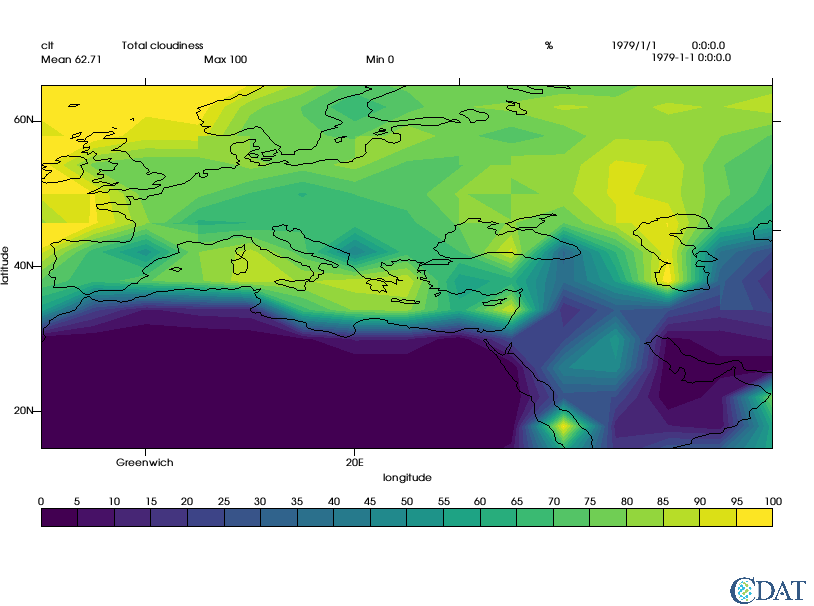

In [11]:
gm.datawc_x1 = -10
gm.datawc_x2 = 60
gm.datawc_y1= 15
gm.datawc_y2 = 65

gm.xticlabels1 = {0:"Greenwich", 20:"20E"}
gm.yticlabels2 = {0:"Equator",60:"Arctic Circle", 45:"45N"}

levels = range(0,101,5) # iso contours to use
colors = vcs.getcolors(levels) # automatically picks colors spread accross your color map
gm.levels = levels
gm.fillareacolors = colors

x.clear()
x.plot(s,gm,bg=bg)

In [12]:
# now to control the LOCATION of elements we use a *template*
t = vcs.createtemplate()

In [13]:
# t.list() would list all properties we can set
t.list()

---------- Template (P) member (attribute) listings ----------
method = P
name = __template_467292516430798
orientation = 0
member =  file
     priority = 1
     x = 0.0500000007451
     y = 0.0130000002682
     texttable = default
     textorientation = default
member =  function
     priority = 1
     x = 0.0500000007451
     y = 0.0130000002682
     texttable = default
     textorientation = default
member =  logicalmask
     priority = 1
     x = 0.0500000007451
     y = 0.0329999998212
     texttable = default
     textorientation = default
member =  transformation
     priority = 1
     x = 0.0500000007451
     y = 0.0529999993742
     texttable = default
     textorientation = default
member =  source
     priority = 1
     x = 0.0500000007451
     y = 0.941999971867
     texttable = default
     textorientation = default
member =  dataname
     priority = 1
     x = 0.0500000007451
     y = 0.922999978065
     texttable = default
     textorientation = default
member =  title
 

x/y coordinate are in % of page
priority is the *layer* higher means on top of other objects, 0 means turn off

important eleements are dataname, title, mean, max, min, units
values come from data plotted

data is the area where to plot the data
legend is the area used by the legend/colorbar

see bellow for more info on text objects, but they are basically contrlled via textorientation and texttable objects properties



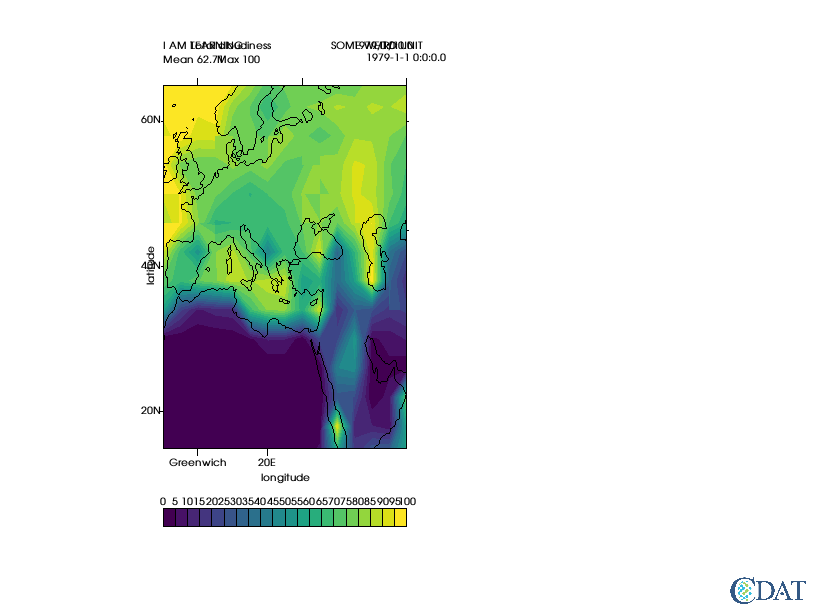

In [14]:
t.min.priority =0 # turn off min
s.id = "I AM LEARNING" # change dataname
s.title = "THSI IS MY TITLE"
s.units= "SOME WEIRD UNIT"

t.reset('x',.2,.5,t.data.x1,t.data.x2) # reset template to go from 20% to %0% of page (left essentially)

x.clear()
x.plot(s,gm,t)

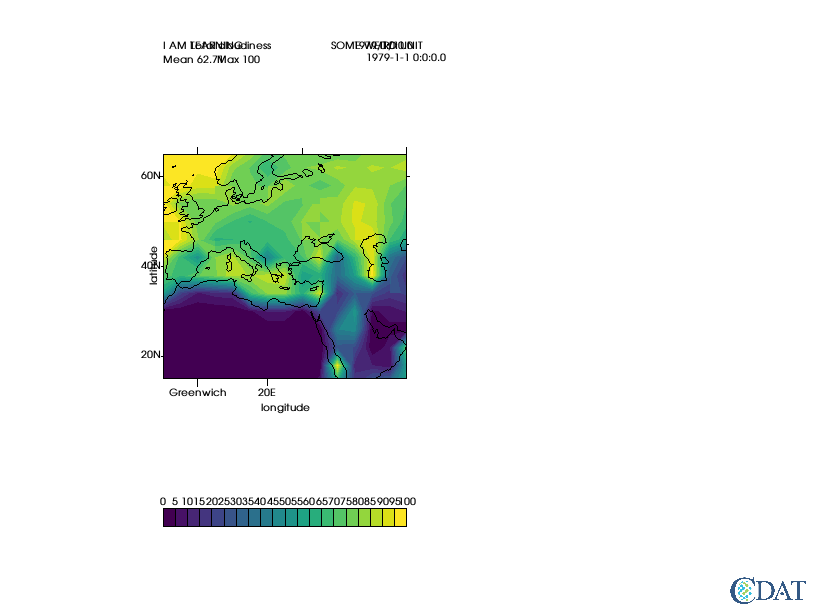

In [15]:
#Let's preserve the aspect ratio
x.clear()
x.plot(s,gm,t,ratio="autot")